# The Battle of Neighborhoods

## Introduction/Business Problem

With NYC undergoing one of the worst economic crises in her lifetime with COVID and civil unrest, what would be the ideal restaurant to open in the Jackson Heights area of Queens, NY? Queens consists of invidividual villages such as Forest Hills (Spiderman's home) and Flushing (home of the Flushing Remonstrance and the U.S Open).


## Data to Solve the Problem

I will use the Foursquare data to look at the venues that are available in the area and analyze to find the trends to see if there is a type of cuisine that is popular and/or popular among the users who contribute to Foursquare. What are the most cuisines that are popular in the area?

The following code imports the libraries that will be used for this project.

In [1]:
!pip install BeautifulSoup4
!pip install requests
!pip install folium
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize  

import folium # map rendering library
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

     |████████████████████████████████| 93 kB 4.0 MB/s  eta 0:00:01


## Jackson Heights, NY

Jackson Heights is located in the borough of Queens, NY. More information can be found here: [https://en.wikipedia.org/wiki/Jackson_Heights%2C_Queens](https://en.wikipedia.org/wiki/Jackson_Heights%2C_Queens). Its zip code is 11372 and according to https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?q=11372, its longitude is -73.884 and latitude is 40.750.  

The following is a map of Jackson Heights created in Folium.

In [16]:
# Create map of Jackson Heights, NY using latitude and longitude values
map_jh = folium.Map(location=[40.750, -73.884], zoom_start=15)
map_jh

## Foursquare

Now that we have a general idea of where Jackson Heights is located, let's access Foursquare and see what information we can get about this area through their API.

In [51]:
# Foursquare API credentials and endpoint
CLIENT_ID = '' # Removed Credentials
CLIENT_SECRET = '' # Removed Credentials
VERSION = '20201024' # put today's date
URL = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, 5000)
city = 'Jackson Heights, NY'

# List of international cuisines (extracted from https://developer.foursquare.com/docs/build-with-foursquare/categories/)
cuisines = {
    'Afghan': '503288ae91d4c4b30a586d67', 
    'African': '4bf58dd8d48988d1c8941735', 
    'American': '4bf58dd8d48988d14e941735', 
    'Burmese': '56aa371be4b08b9a8d573568', 
    'Cambodian': '52e81612bcbc57f1066b7a03', 
    'Chinese': '4bf58dd8d48988d145941735', 
    'Filipino': '4eb1bd1c3b7b55596b4a748f', 
    'Himalayan': '52e81612bcbc57f1066b79fb', 
    'Indonesian': '4deefc054765f83613cdba6f', 
    'Japanese': '4bf58dd8d48988d111941735', 
    'Korean': '4bf58dd8d48988d113941735', 
    'Malay': '4bf58dd8d48988d156941735', 
    'Mongolian': '4eb1d5724b900d56c88a45fe', 
    'Thai': '4bf58dd8d48988d149941735', 
    'Tibetan': '52af39fb3cf9994f4e043be9', 
    'Vietnamese': '4bf58dd8d48988d14a941735', 
    'Australian': '4bf58dd8d48988d169941735', 
    'Austrian': '52e81612bcbc57f1066b7a01', 
    'Bangladeshi': '5e179ee74ae8e90006e9a746', 
    'Belgian': '52e81612bcbc57f1066b7a02', 
    'Caribbean': '4bf58dd8d48988d144941735', 
    'Caucasian': '5293a7d53cf9994f4e043a45', 
    'Czech': '52f2ae52bcbc57f1066b8b81', 
    'Dutch': '5744ccdfe4b0c0459246b4d0', 
    'Belarusian': '52e928d0bcbc57f1066b7e97', 
    'Bosnian': '58daa1558bbb0b01f18ec1ee', 
    'Bulgarian': '56aa371be4b08b9a8d5734f3', 
    'Romanian': '52960bac3cf9994f4e043ac4', 
    'Tatar': '52e928d0bcbc57f1066b7e98', 
    'English': '52e81612bcbc57f1066b7a05', 
    'French': '4bf58dd8d48988d10c941735', 
    'German': '4bf58dd8d48988d10d941735', 
    'Greek': '4bf58dd8d48988d10e941735', 
    'Hawaiian': '52e81612bcbc57f1066b79fe', 
    'Hungarian': '52e81612bcbc57f1066b79fa', 
    'Indian': '4bf58dd8d48988d10f941735', 
    'Italian': '4bf58dd8d48988d110941735', 
    'Salvadoran': '5745c7ac498e5d0483112fdb', 
    'Argentinian': '4bf58dd8d48988d107941735', 
    'Brazilian': '4bf58dd8d48988d16b941735', 
    'Colombian': '58daa1558bbb0b01f18ec1f4', 
    'Peruvian': '4eb1bfa43b7b52c0e1adc2e8', 
    'Venezuelan': '56aa371be4b08b9a8d573558', 
    'Moroccan': '4bf58dd8d48988d1c3941735', 
    'Mexican': '4bf58dd8d48988d1c1941735', 
    'Egyptian': '5bae9231bedf3950379f89e1', 
    'Iraqi': '5bae9231bedf3950379f89e7', 
    'Israeli': '56aa371be4b08b9a8d573529', 
    'Kurdish': '5744ccdfe4b0c0459246b4ca', 
    'Lebanese': '58daa1558bbb0b01f18ec1cd', 
    'Persian': '52e81612bcbc57f1066b79f7', 
    'Syrian': '5bae9231bedf3950379f89da', 
    'Yemeni': '5bae9231bedf3950379f89ea', 
    'Pakistani': '52e81612bcbc57f1066b79f8', 
    'Polish': '52e81612bcbc57f1066b7a04', 
    'Portuguese': '4def73e84765ae376e57713a', 
    'Russian': '5293a7563cf9994f4e043a44', 
    'Scandinavian': '4bf58dd8d48988d1c6941735', 
    'Scottish': '5744ccdde4b0c0459246b4a3', 
    'Slovak': '56aa371be4b08b9a8d57355a', 
    'Spanish': '4bf58dd8d48988d150941735', 
    'Sri Lankan': '5413605de4b0ae91d18581a9', 
    'Swiss': '4bf58dd8d48988d158941735', 
    'Turkish': '4f04af1f2fb6e1c99f3db0bb', 
    'Ukranian': '52e928d0bcbc57f1066b7e96'
}

restaurants = pd.DataFrame(columns=['City', 'Cuisine', 'Json']) # define the DataFrame where the results will be stored

for cuisine_name, category_id in cuisines.items():
# For each city, retrieve the top restaurants from Foursquare for each cuisine...
   query = requests.get("{url}&near={city}&categoryId={category_id}".format(url=URL, city=city, category_id=category_id))
   if query.status_code == 200:
      number = query.json()
      restaurants = restaurants.append({
                'City': city,
                'Cuisine': cuisine_name,
                'Json': number
      }, ignore_index=True)
    


The `restaurants` dataframe stores the information returned by Foursquare. 

The JSON data is stored in the Json column.

In [52]:
restaurants.head()



,City,Cuisine,Json
0,"Jackson Heights, NY",Afghan,"{'meta': {'code': 200, 'requestId': '5f94c956b..."
1,"Jackson Heights, NY",African,"{'meta': {'code': 200, 'requestId': '5f94c9572..."
2,"Jackson Heights, NY",American,"{'meta': {'code': 200, 'requestId': '5f94c957e..."
3,"Jackson Heights, NY",Burmese,"{'meta': {'code': 200, 'requestId': '5f94c957d..."
4,"Jackson Heights, NY",Cambodian,"{'meta': {'code': 200, 'requestId': '5f94c958c..."


Next, let's parse through the data to obtain the number of restaurants in each cuisine.

In [116]:
import json
from collections import Counter

for i in range(len(restaurants)):
    restaurants['Number'].iloc[i] = restaurants['Json'].iloc[i]['response']['totalResults']

restaurants.head()

,City,Cuisine,Json,Number
0,"Jackson Heights, NY",Afghan,"{'meta': {'code': 200, 'requestId': '5f94c956b...",5
1,"Jackson Heights, NY",African,"{'meta': {'code': 200, 'requestId': '5f94c9572...",3
2,"Jackson Heights, NY",American,"{'meta': {'code': 200, 'requestId': '5f94c957e...",35
3,"Jackson Heights, NY",Burmese,"{'meta': {'code': 200, 'requestId': '5f94c957d...",2
4,"Jackson Heights, NY",Cambodian,"{'meta': {'code': 200, 'requestId': '5f94c958c...",0


Let's find the cuisine with the most amount around Jackson Heights. Here is a visualization.

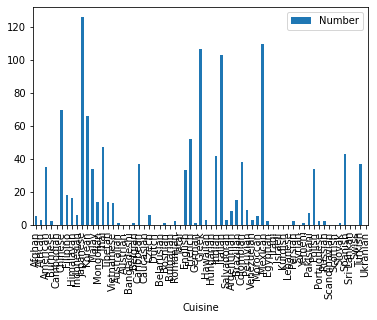

In [118]:
restaurants.plot.bar(x="Cuisine", y ="Number")

In [126]:
maxNum = restaurants['Number'].max()
popularCuisines = restaurants[restaurants['Number'] == maxNum]

popularCuisines

,City,Cuisine,Json,Number
9,"Jackson Heights, NY",Japanese,"{'meta': {'code': 200, 'requestId': '5f94c959d...",126


In [ ]:
It looks like the popular cuisine is **Japanese**. 

According to the data from Foursquare, the popular cuisine is Japanese and the most likely safe bet is to open a Japanese restaurant. However, in future research, one can take the users who have contributed to Foursquare and find what popular cuisine is absent within the area of Jackson Heights to open a restaurant with that type.